# Look for min and max for the Close

In [1]:
import pandas as pd

df = pd.read_csv('BTCUSDT.csv')

In [2]:
df.sample(10)

,Date,Open,Hight,Low,Close,Volume,Quote_Volume,Trades_Count,VolumeGain,pricegain
693,2021-04-12 03:57:00,60299.19,60346.50,60296.93,60305.68,36.498312,2.201759e+06,938,8.324429,-0.112379
286,2021-04-11 21:10:00,59528.26,59601.99,59528.25,59587.94,18.843527,1.122360e+06,840,-14.468193,-0.059885
1160,2021-04-12 11:44:00,60185.20,60212.00,60166.18,60211.91,49.776875,2.996232e+06,1280,-38.774913,0.076007
7,2021-04-11 16:31:00,59560.00,59585.10,59530.00,59566.33,28.958792,1.724762e+06,1697,29.129640,-0.089812
835,2021-04-12 06:19:00,60211.27,60259.23,60211.26,60255.00,25.245955,1.520719e+06,1260,17.966423,-0.047676
892,2021-04-12 07:16:00,60949.49,60952.00,60864.36,60921.64,58.035132,3.534570e+06,1412,-14.164610,0.179305
156,2021-04-11 19:00:00,59865.01,59895.83,59865.00,59880.65,25.016433,1.497882e+06,1132,71.951717,-0.027221
963,2021-04-12 08:27:00,60779.79,60782.62,60700.00,60720.26,32.938413,2.000442e+06,1203,50.818036,-0.033224
914,2021-04-12 07:38:00,61023.50,61029.37,60931.69,60937.27,88.310273,5.385109e+06,2666,9.814542,-0.139277
222,2021-04-11 20:06:00,59721.56,59721.57,59674.97,59680.04,12.662936,7.558501e+05,887,-17.294160,-0.022968


In [3]:
df.dtypes

Date             object
Open            float64
Hight           float64
Low             float64
Close           float64
Volume          float64
Quote_Volume    float64
Trades_Count      int64
VolumeGain      float64
pricegain       float64
dtype: object

In [4]:
df.columns

Index(['Date', 'Open', 'Hight', 'Low', 'Close', 'Volume', 'Quote_Volume',
       'Trades_Count', 'VolumeGain', 'pricegain'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

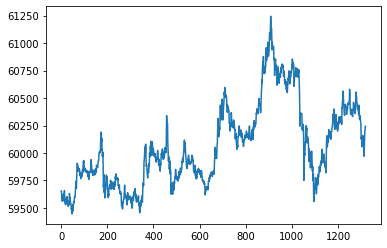

In [8]:
plt.figure()
close.plot()

In [9]:
print('Minimum value for the Close is:' ,df.Close.min())
print('Index of the minimum value for the Close is:' ,df.index[df.Close == df.Close.min()].tolist()[0])
print('Date of the maximum value for the Close is :' ,df.Date[df.index[df.Close == df.Close.min()].tolist()[0]])

Minimum value for the Close is: 59445.72
Index of the minimum value for the Close is: 47
Date of the maximum value for the Close is : 2021-04-11 17:11:00


In [10]:
print('Maximum value for the Close is :' ,df.Close.max())
print('Index of the maximum value for the Close is  :' ,df.index[df.Close == df.Close.max()].tolist()[0])
print('Date of the maximum value for the Close is :' ,df.Date[df.index[df.Close == df.Close.max()].tolist()[0]])

Maximum value for the Close is : 61243.98
Index of the maximum value for the Close is  : 908
Date of the maximum value for the Close is : 2021-04-12 07:32:00


In [11]:
df.columns

Index(['Date', 'Open', 'Hight', 'Low', 'Close', 'Volume', 'Quote_Volume',
       'Trades_Count', 'VolumeGain', 'pricegain'],
      dtype='object')

# Close Data

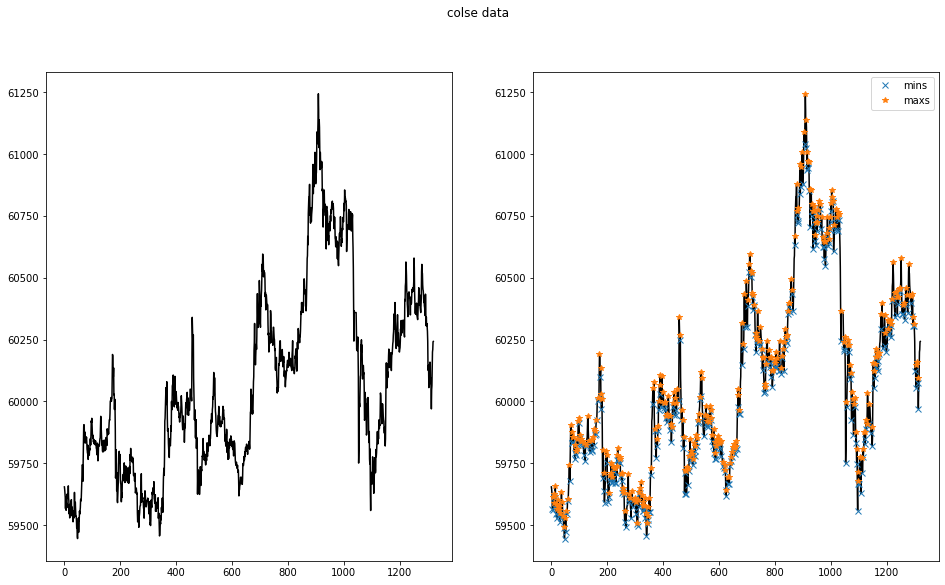

In [12]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

close_array = close.to_numpy()
maxs, _ = find_peaks(close_array)
mins, _ =find_peaks(close_array*-1)
#x = range(0,len(close_array))
x = np.linspace(0, len(close_array), len(close_array))

plt.rcParams['figure.figsize'] = (16, 9)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('colse data')
ax1.plot(x, close_array, color='black')
ax2.plot(x, close_array, color='black');
ax2.plot(x[mins], close_array[mins], 'x', label='mins')
ax2.plot(x[maxs], close_array[maxs], '*', label='maxs')
ax2.legend()

In [13]:
df.Close[maxs].index

Int64Index([   5,    8,   10,   12,   14,   18,   20,   22,   25,   27,
            ...
            1267, 1270, 1278, 1286, 1291, 1294, 1296, 1302, 1307, 1310],
           dtype='int64', length=338)

In [14]:
df.Close[maxs]

5       59613.54
8       59588.95
10      59625.94
12      59618.57
14      59658.71
          ...   
1294    60341.13
1296    60314.72
1302    60147.10
1307    60159.15
1310    60094.16
Name: Close, Length: 338, dtype: float64

In [15]:
df1 = df.Close[maxs]
df2 = pd.DataFrame(df.Date[df.Close[maxs].index],
                   columns=['Date'])

frames = [df1, df2]
result = pd.concat(frames, axis=1, join="inner")
result = result.rename({'Close': 'Close Max'}, axis=1)
result

,Close Max,Date
5,59613.54,2021-04-11 16:29:00
8,59588.95,2021-04-11 16:32:00
10,59625.94,2021-04-11 16:34:00
12,59618.57,2021-04-11 16:36:00
14,59658.71,2021-04-11 16:38:00
...,...,...
1294,60341.13,2021-04-12 13:58:00
1296,60314.72,2021-04-12 14:00:00
1302,60147.10,2021-04-12 14:06:00
1307,60159.15,2021-04-12 14:11:00


In [16]:
df1 = df.Close[mins]
df2 = pd.DataFrame(df.Date[df.Close[mins].index],
                   columns=['Date'])

frames = [df1, df2]
result = pd.concat(frames, axis=1, join="inner")
result = result.rename({'Close': 'Close Min'}, axis=1)
result

,Close Min,Date
4,59567.01,2021-04-11 16:28:00
6,59560.01,2021-04-11 16:30:00
9,59571.71,2021-04-11 16:33:00
11,59614.08,2021-04-11 16:35:00
13,59608.84,2021-04-11 16:37:00
...,...,...
1295,60304.69,2021-04-12 13:59:00
1301,60125.16,2021-04-12 14:05:00
1303,60056.02,2021-04-12 14:07:00
1309,60072.73,2021-04-12 14:13:00


# Open Data

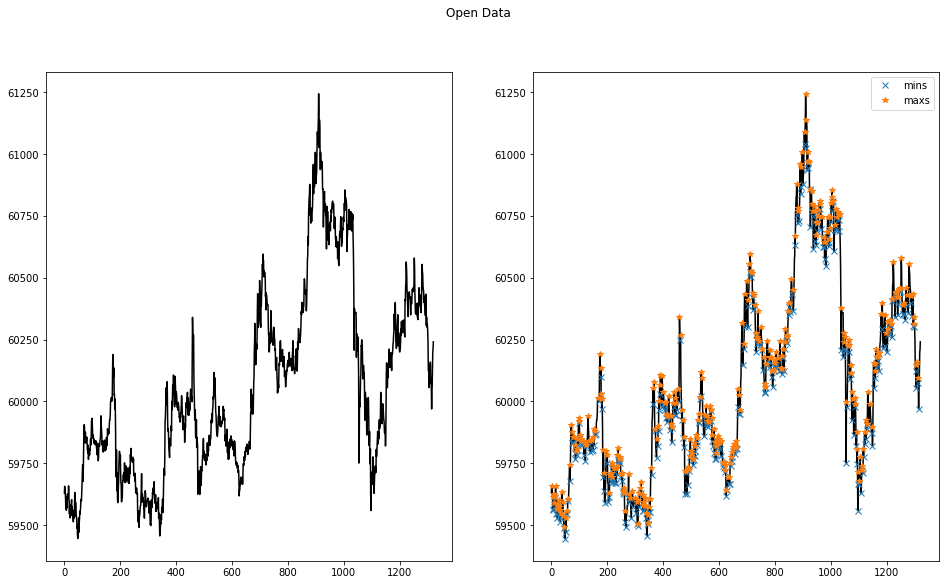

In [17]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

open_array = open.to_numpy()
maxs, _ = find_peaks(open_array)
mins, _ =find_peaks(open_array*-1)
#x = range(0,len(close_array))
x = np.linspace(0, len(open_array), len(open_array))

plt.rcParams['figure.figsize'] = (16, 9)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Open Data')
ax1.plot(x, open_array, color='black')
ax2.plot(x, open_array, color='black');
ax2.plot(x[mins], open_array[mins], 'x', label='mins')
ax2.plot(x[maxs], open_array[maxs], '*', label='maxs')
ax2.legend()

In [18]:
df1 = df.Close[maxs]
df2 = pd.DataFrame(df.Date[df.Close[maxs].index],
                   columns=['Date'])

frames = [df1, df2]
result = pd.concat(frames, axis=1, join="inner")
result = result.rename({'Close': 'Close Max'}, axis=1)
result

,Close Max,Date
1,59644.97,2021-04-11 16:25:00
6,59560.01,2021-04-11 16:30:00
9,59571.71,2021-04-11 16:33:00
11,59614.08,2021-04-11 16:35:00
13,59608.84,2021-04-11 16:37:00
...,...,...
1295,60304.69,2021-04-12 13:59:00
1297,60301.78,2021-04-12 14:01:00
1303,60056.02,2021-04-12 14:07:00
1308,60152.04,2021-04-12 14:12:00


In [19]:
df1 = df.Close[mins]
df2 = pd.DataFrame(df.Date[df.Close[mins].index],
                   columns=['Date'])

frames = [df1, df2]
result = pd.concat(frames, axis=1, join="inner")
result = result.rename({'Close': 'Close Min'}, axis=1)
result

,Close Min,Date
5,59613.54,2021-04-11 16:29:00
7,59566.33,2021-04-11 16:31:00
10,59625.94,2021-04-11 16:34:00
12,59618.57,2021-04-11 16:36:00
14,59658.71,2021-04-11 16:38:00
...,...,...
1296,60314.72,2021-04-12 14:00:00
1302,60147.10,2021-04-12 14:06:00
1304,60104.60,2021-04-12 14:08:00
1310,60094.16,2021-04-12 14:14:00


# RSI

In [20]:
from talib import RSI, BBANDS

up, mid, low = BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
rsi = RSI(close, timeperiod=14)
print("RSI (first 10 elements)\n", rsi[14:24])

ModuleNotFoundError: No module named 'talib'